###Importing Modules with Preparing Dataset

In [ ]:
!pip install arabic_reshaper
!pip install stop_words
!pip install python-bidi

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from bidi.algorithm import get_display
from stop_words import get_stop_words
from arabic_reshaper import arabic_reshaper

In [16]:
df = pd.read_csv('/content/Trial Arabic dataset for WordCount.csv',encoding='utf16',on_bad_lines='skip')
df.head()

,reviews\tclassify
0,اللون والخامة\t1
1,رائع\t1
2,حلوة جداً و سعرها خطير\t1
3,جميل اوي وكويس علي سعرة\t1
4,الخامه رديئه جدا\t-1


In [17]:
df = df['reviews\tclassify'].str.split('\t', n=1, expand=True)
df.head()

,0,1
0,اللون والخامة,1
1,رائع,1
2,حلوة جداً و سعرها خطير,1
3,جميل اوي وكويس علي سعرة,1
4,الخامه رديئه جدا,-1


In [18]:
df = df.rename(columns={0:'Review', 1: 'Classify'})
df["Classify"] = pd.to_numeric(df["Classify"])

In [19]:
df.head()

,Review,Classify
0,اللون والخامة,1
1,رائع,1
2,حلوة جداً و سعرها خطير,1
3,جميل اوي وكويس علي سعرة,1
4,الخامه رديئه جدا,-1


###Tokenization to Determine Most Common Words with Partial Cleaning of the Dataset

In [ ]:
nltk.download('punkt')
text_column = df.loc[0:,'Review']
list_tokens = [nltk.word_tokenize(line) for line in text_column]
print(list_tokens)

In [ ]:
word_list = []
for lst in list_tokens:
  for word in lst:
    word_list.append(word)
print(word_list)

In [ ]:
#to remove '?' and english words from the list
pt = r'[A-Za-z0-9?]'
arabic_list=[]
for word in word_list:
  cleaned_word = re.sub(pt, '', word)
  arabic_list.append(cleaned_word)

stop_points = ['.', "'", ',', "-", ''] 

print('The list after removing English words and Question marks is:', arabic_list)

cleaned_list = list(filter(lambda x: x not in stop_points, arabic_list))

print('The list after removing most characters is: ', cleaned_list)


In [23]:
cleaned_words = nltk.FreqDist(word for word in cleaned_list)
word_features = cleaned_words.most_common(500)
print(word_features)

[('جدا', 499), ('جيد', 209), ('حلو', 202), ('و', 188), ('بس', 152), ('مش', 137), ('ممتاز', 133), ('خامة', 114), ('الخامه', 112), ('من', 111), ('خامه', 104), ('الخامة', 103), ('في', 98), ('الالوان', 98), ('جميل', 97), ('منتج', 91), ('كويس', 86), ('المنتج', 73), ('اوي', 71), ('مناسب', 70), ('حلوه', 63), ('جيدة', 60), ('مريح', 59), ('حلوة', 58), ('تحفه', 53), ('مظبوط', 51), ('غير', 51), ('سعره', 47), ('ممتازه', 47), ('كويسه', 47), ('لسعره', 46), ('خامته', 46), ('المقاس', 46), ('الصورة', 45), ('جيده', 45), ('ممتازة', 45), ('بالنسبة', 44), ('رائع', 42), ('السعر', 42), ('للسعر', 41), ('جميله', 40), ('ومريح', 39), ('كويسة', 39), ('على', 37), ('الوان', 37), ('الألوان', 37), ('حلوين', 36), ('لكن', 35), ('ولكن', 35), ('شكرا', 35), ('علي', 33), ('الصوره', 33), ('فى', 32), ('شيك', 31), ('...', 31), ('سعر', 31), ('والمقاس', 30), ('قد', 30), ('اللبس', 29), ('حاجه', 28), ('نفس', 27), ('لا', 27), ('قطن', 27), ('وسعر', 26), ('ف', 26), ('بالنسبه', 26), ('عن', 26), ('كبير', 25), ('جميلة', 25), ('تحفة', 2

###Using WordCount

In [ ]:
#taking first 99 words
hundred_list = []
for i in range(100):
  hundred_list.append(word_features[i][0])
print(hundred_list)

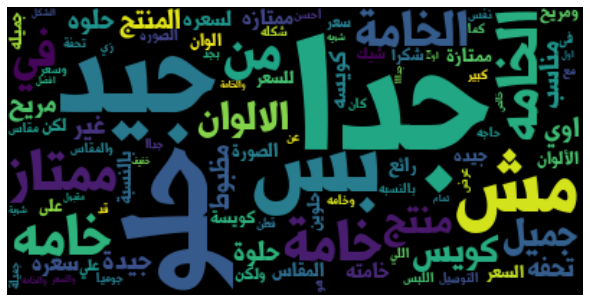

In [25]:
arabic_stop = get_stop_words('arabic')
stop_words = set(arabic_stop)
wc = WordCloud(stopwords=stop_words, font_path='/content/Shorooq_N1.ttf')
reversed_words = []
for word in hundred_list:
  text = arabic_reshaper.reshape(word)
  text = get_display(text)
  reversed_words.append(text)
pos_string = pd.Series(reversed_words).str.cat(sep=' ')
wc.generate(pos_string)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()